In [28]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# importing the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Iris.csv'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris.csv
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
# Independent Variables:
X = df.drop(columns=['Iris.csv'])
y = df['Iris.csv']

# Map the target variable to new encoding
# Original target values: 0 ='Iris-setosa', 1 ='Iris-versicolor', 2='Iris-virginica'
df ['Iris.csv'] = df['Iris.csv'].map({0: 0, 1: 1, 2: 1})

# Display the first few rows of the rows of the Dta Frame to check the mapping
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Iris.csv  
0         0  
1         0  
2         0  
3         0  
4         0  


In [30]:
# Define independent variables(X) and dependent variable (y)
X = df.drop(columns=['Iris.csv'])
y = df['Iris.csv']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [31]:
# Initialize the logistic regression model 
logreg = LogisticRegression(max_iter=200)

# Fit the model on the training data 
logreg.fit(X_train, y_train)

# Make a predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model 
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0]
 [ 0 20]]


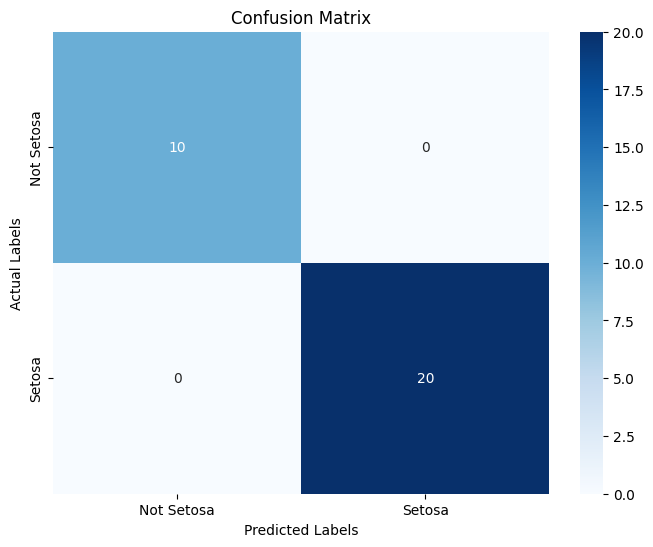

In [33]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n",conf_matrix)

# Visualize the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=['Not Setosa', 'Setosa'], yticklabels=['Not Setosa','Setosa'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Explanation of the Confusion Matrix
A confusion matrix compares the actual labels with the predicted labels.
> True Negatives(TN): Correctly predicted negatives(Not Setosa).
> False Positives(FP): Incorrectly predicted positives(predicted Setosa but actual Not Setosa).
> False Negatives(FN): Incorrectly predicted negatives(predicted Not Setosa but actually Setosa).
> True Positives(TP): Correctly predicted positives(Setosa).

# Calculate Precision and Recall 
> Precision:(\frac{TP}{TP+FP})
Precision measures the accuracy of the positive predictions

> Recall:(\frac{TP}{TP + FN})
Recall measures the ability to find all the positive samples

# Sample Analysis
Assume the confusion matrix looks like this:
Confusion Matrix:
[[24  1]
 [1   4]]

> True Negatives(TN):24
> False Positives(FP):1
> False Negatives(FN):1
> True Positives(TP):4

Using these values:
Precision:(\frac{4}{4 + 1} = 0.80)
Recall:(\frac{4}{4 + 1} 0.80)

If the precision and recall are similar(both 0.80 in this example), 
the model is balanced in terms of both precision and recall.

However, the actual numbers can differ based on the confusion matrix from your specific model run.
The classification report printed in the code will also provide these metrics for a more detailed analysis.

From this Example, we would predict that the model like;y has similar precision and recall.
However , if the confusion matrix shows significantly more false positives or false negatives, it could indicate a higher precision or recall respectively



In [34]:
# Calculate accuracy, precision, and recall manually
TN, FP, FN, TP = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)

precision  = TP / (TP + TN)

recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 0.6666666666666666
Recall: 1.0


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


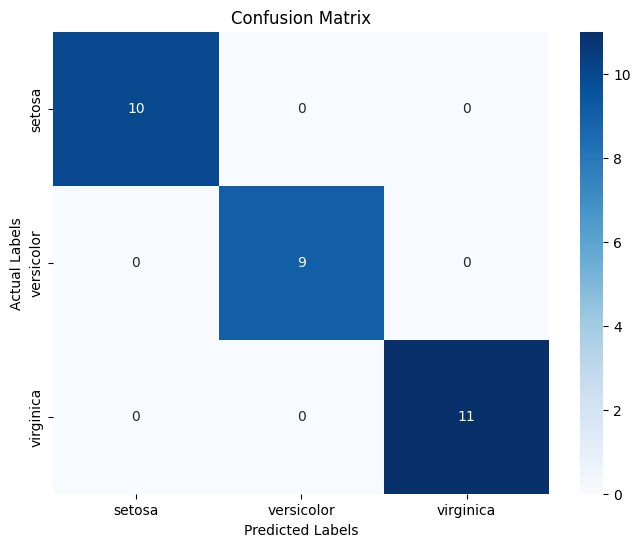

Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# importing the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Iris.csv'] = iris.target

# Define independent variables(X) and dependent(y)
X = df.drop(columns=['Iris.csv'])
y =df['Iris.csv']

# Split the data into training test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=200)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy, precision and recall for each class
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Accuracy:", accuracy)
print("Classification Report:", report)
